<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.   
Нужно научиться определять рыночную стоимость объектов недвижимости.   
Ваша задача — установить параметры.   
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных.  
Первые вписаны пользователем,  
вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**  

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

## 1. Изучение данных из файла

In [3]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# отображение в jupiter всех колонок датафрейма 
pd.set_option('display.max_columns', None)

# открытие файла
data = pd.read_csv(r'C:\Users\Dao\YandexDisk\IT\Datasets\real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# случайная выборка
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21052,13,4100000.0,35.2,2016-03-01T00:00:00,1,2.8,17.0,18.5,1,NaN,False,False,8.5,NaN,Санкт-Петербург,29871.0,10735.0,1.0,361.0,0.0,NaN,787.0
17039,4,6680000.0,83.6,2017-08-07T00:00:00,3,NaN,14.0,46.7,2,NaN,False,False,11.8,NaN,Санкт-Петербург,35357.0,15659.0,1.0,804.0,3.0,512.0,523.0
5248,0,6650000.0,58.1,2017-12-09T00:00:00,3,2.7,8.0,34.7,4,NaN,False,False,7.4,2.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,7.0
983,7,3200000.0,34.0,2017-09-07T00:00:00,1,NaN,21.0,17.0,6,NaN,False,False,9.6,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2291,6,27000000.0,173.6,2015-06-11T00:00:00,5,3.3,5.0,125.5,4,False,False,False,15.0,1.0,Санкт-Петербург,21776.0,399.0,2.0,65.0,3.0,562.0,388.0


In [5]:
# проверка стиля заголовков
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### 1.1 Выводы  
  
Данные содержат информацию о проданных квартирах в г. Санкт-Петербурге и его пригородах за несколько лет:  
- о процессе продажи квартиры (цена на момент снятия с публикации, дате подачи объявления, количестве фотографий, сроке сдачи);
- жилищных характеристиках квартиры; 
- характеристиках дома, где квартира находится;  
- о количестве инфраструктурных объектов (парки, водоемы) и расстояния до них;  
- информацию о транспортной доступности: название города, расстояние до аэропорта и центра;  

Прежде, чем переходить к анализу, необходимо решить следующие проблемы в данных:  

1. Пропуски в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name,  airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.  
2. Проблемы со стилем в столбцах: cityCenters_nearest, parks_around3000, ponds_around3000.  
3. Неподходящий тип данных в столбцах (в скобках на какой тип нужно изменить): last_price (int), first_day_exposition (datetime), floors_total (int), is_apartment (bool), balcony (int), airports_nearest (int), cityCenters_nearest (int), parks_around3000 (int), ponds_nearest(int), days_exposition(int), parks_nearest(int), parks_around_3000(int). 


## 2. Предобработка данных

### 2.1 Приведение заголовков к единому стилю

In [6]:
data = data.rename(columns= {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000',
                              'ponds_around3000':'ponds_around_3000'})

print('Заголовки приведены к единому стилю:\n\n', data.columns)

Заголовки приведены к единому стилю:

 Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### 2.2 Обработка пропусков

Посмотрим количество пропусков.

In [7]:
print('Пропуски до обработки:\n')
print()
print(data.isna().sum())

Пропуски до обработки:


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Прпуски могли появиться из-за незнания или невнимательности заполнявшего объявление.   
  
Столбец locality_name содержит название населённого пункта. Заменить их не получится, при этом данные значения необоходимы в дальнейшем анализе. Придется удалить все строки с пропусками в этом столбце. 

In [8]:
print('Количество пропусков в столбце locality_name до:', data['locality_name'].isna().sum())
data.dropna(subset = ['locality_name'], inplace = True) 
print('Количество пропусков в столбце locality_name после:', data['locality_name'].isna().sum())

Количество пропусков в столбце locality_name до: 49
Количество пропусков в столбце locality_name после: 0


Изучим статистику по столбцам с пропусками.

In [9]:
# код закомментирован, чтобы не засорять тетрадь

# data['ceiling_height'].describe()
# data['floors_total'].describe()
# data['living_area'].describe()
# data['kitchen_area'].describe()

В следующих столбцах пропуски можно заменить средним значением выборки (в качестве среднего лучше подойдет медиана - это позволит избежать искажения данных из-за выбросов):  
- ceiling_height - высота потолков, медиана: 2.65 метра;  
- floors_total - всего этажей в доме, медиана: 9 этажей. Для каждого этажа она будет различной;  
- living_area - жилая площадь, медиана: 30 метров. Медиана будет отличаться в зависимости от количества комнат;  
- kitchen_area - площадь кухни, медиана: 9.1 метра. В квартирах-студиях нет кухни;  
  
Заменим значения в столбце ceiling_height медианным значением. Т.к. высота потолков подчиняется строительным стандартам, которые являются достаточно типичными в типовом жилье, которое, в свою очередь занимает большую часть жилищного фонда в России.

In [10]:
# для автоматизации процесса обработки пропусков определим функцию fillna_median_print()

'''
Функция fillna_median_print(column, value) заменяет пропуски в столбце на медианное значение. 
И выводит сообщения о пропусках до и после.
Принимает один аргумент:
 - column - столбец, где нужно заменить пропуски.
'''

def fillna_median_print(column):
    print(f'Количество пропусков в столбце {column} до:', data[column].isna().sum())
    median = data[column].median()
    data[column] = data[column].fillna(median)
    print(f'Количество пропусков в столбце {column} после:', data[column].isna().sum())

# заменим пропуски в столбце ceiling_height медианным значением 

fillna_median_print('ceiling_height')

Количество пропусков в столбце ceiling_height до: 9160
Количество пропусков в столбце ceiling_height после: 0


Пропуски в столбце floors_total (количество этажей) также заменим медианным значением. Но на этот раз с группировкой по этажу, на котором расположена квартира.

In [11]:
# для автоматизации процесса обработки пропусков определим функцию fillna_median_group()

'''
Функция fillna_median_group(column, group) заменяет пропуски в столбце медианным значением с группировкой по другому столбцу.
И выводит сообщения о пропусках до и после.
Принимает два аргумента:
 - column - столбец, где нужно заменить пропуски;
 - group - столбец, по которому группируются значения.
'''

def fillna_median_group(column, group):
    print(f'Количество пропусков в столбце {column} до:', data[column].isna().sum())
    for value in data[group].unique():
        median = data.loc[data[group] == value, column].median()
        data.loc[(data[column].isna()) & (data[group] == value), column] = median
    print(f'Количество пропусков в столбце {column} после:', data[column].isna().sum())

# заменим пропуски в столбце floors_total медианным значением    
fillna_median_group('floors_total', 'floor')

Количество пропусков в столбце floors_total до: 85
Количество пропусков в столбце floors_total после: 0


Жилую площадь и площадь кухни лучше всего заполнить с группировкой по числу комнат.

In [12]:
# заменим пропуски в столбце living_area медианным значением с группировкой по числу комнат.    
fillna_median_group('living_area', 'rooms')

# в квартирах-студиях нет кухни, поэтому пропуски по столбцу kitchen_area, соответствующим этому условию, сначала заполним 0
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0

# заменим пропуски в столбце living_area медианным значением с группировкой по числу комнат.    
fillna_median_group('kitchen_area', 'rooms')

Количество пропусков в столбце living_area до: 1898
Количество пропусков в столбце living_area после: 0
Количество пропусков в столбце kitchen_area до: 2120
Количество пропусков в столбце kitchen_area после: 0


Пропуски в значениях расстояний до центра города, ближайшего аэропорта, водоема и парка, а также в количествах водоёмов и парков в радиусе 3 км заполним медианой с группировкой по населенному пункту:   

- airports_nearest  
- city_centers_nearest   
- parks_nearest  
- ponds_nearest   
- ponds_around_3000  
- parks_around_3000 

In [13]:
# используем для этого функцию fillna_median_group()   
fillna_median_group('airports_nearest', 'locality_name')
fillna_median_group('city_centers_nearest', 'locality_name')
fillna_median_group('parks_nearest', 'locality_name')
fillna_median_group('ponds_nearest', 'locality_name')
fillna_median_group('ponds_around_3000', 'locality_name')
fillna_median_group('parks_around_3000', 'locality_name')

Количество пропусков в столбце airports_nearest до: 5534
Количество пропусков в столбце airports_nearest после: 5386
Количество пропусков в столбце city_centers_nearest до: 5511
Количество пропусков в столбце city_centers_nearest после: 5386
Количество пропусков в столбце parks_nearest до: 15586
Количество пропусков в столбце parks_nearest после: 5998
Количество пропусков в столбце ponds_nearest до: 14565
Количество пропусков в столбце ponds_nearest после: 5494
Количество пропусков в столбце ponds_around_3000 до: 5510
Количество пропусков в столбце ponds_around_3000 после: 5386
Количество пропусков в столбце parks_around_3000 до: 5510
Количество пропусков в столбце parks_around_3000 после: 5386


В столбцах осталось много пропусков. Видимо, это связано с тем, что по многим населенным пунктам нет картографических данных по этим объектам. Это можно объяснить либо техническими сбоями при формировании данных, либо с тем, что у населенного пункта может не быть парка и др. объектов.  
Заменим оставшиеся пропуски медианой по каждой выборке.

In [14]:
fillna_median_print('airports_nearest')
fillna_median_print('city_centers_nearest')
fillna_median_print('parks_nearest')
fillna_median_print('ponds_nearest')
fillna_median_print('ponds_around_3000')
fillna_median_print('parks_around_3000')

Количество пропусков в столбце airports_nearest до: 5386
Количество пропусков в столбце airports_nearest после: 0
Количество пропусков в столбце city_centers_nearest до: 5386
Количество пропусков в столбце city_centers_nearest после: 0
Количество пропусков в столбце parks_nearest до: 5998
Количество пропусков в столбце parks_nearest после: 0
Количество пропусков в столбце ponds_nearest до: 5494
Количество пропусков в столбце ponds_nearest после: 0
Количество пропусков в столбце ponds_around_3000 до: 5386
Количество пропусков в столбце ponds_around_3000 после: 0
Количество пропусков в столбце parks_around_3000 до: 5386
Количество пропусков в столбце parks_around_3000 после: 0


Столбец is_apartment содержит булевы значения, показывающие относится ли тип квартиры к апартаментам. В России апартаментами ([называются)](https://realty.rbc.ru/news/5fc897769a7947df26e675e9) нежилые помещения, которые используют для проживания. Это нераспространенный у нас тип жилья, поэтому наиболее вероятным будет предположение, что пропуски в этом столбце означают эквивалент "нет, не апартаменты".  
Поэтому заполним значением False.  
Автоматически тип данных в столбце изменится с object на bool.

In [15]:
print('Количество пропусков в столбце is_apartment до:', data['is_apartment'].isna().sum())
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Количество пропусков в столбце is_apartment после:', data['is_apartment'].isna().sum())


Количество пропусков в столбце is_apartment до: 20890
Количество пропусков в столбце is_apartment после: 0


В столбец balcony (количество балоконов) пропуски скорее всего являются экввалентом 0, т.е. отсутствия балкона. Значит, заменим их нулями.

In [16]:
print('Количество пропусков в столбце balcony до:', data['balcony'].isna().sum())
data['balcony'] = data['balcony'].fillna(0)
print('Количество пропусков в столбце balcony после:', data['balcony'].isna().sum())

Количество пропусков в столбце balcony до: 11513
Количество пропусков в столбце balcony после: 0


Посмотрим как пропуски в days_exposition (сколько дней было размещено объявление (от публикации до снятия)) распределены относительно даты публикации.

In [17]:
# для начала изменим тип данных в столбце first_day_exposition с object на datetime
# оставим только год, месяц и день, т.к. время не указано изначально

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

<AxesSubplot:xlabel='first_day_exposition'>

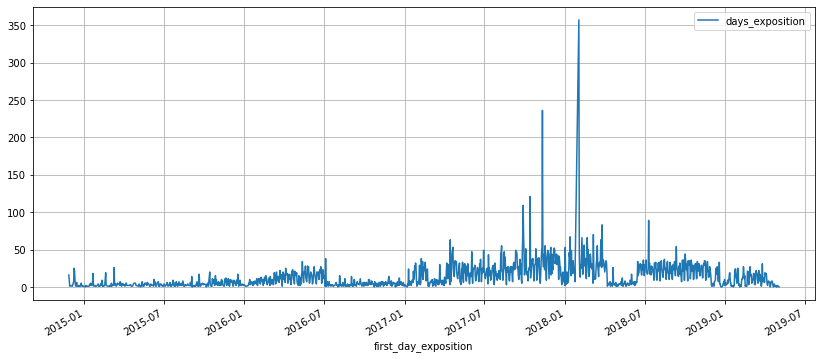

In [18]:
# построим график распределения количества публикаций во времени
# для этого создадим сводную таблицу количества значений days_exposition для каждой даты в first_day_exposition
# и применим метод plot() для построения графика
(
    data.pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='count')
    .plot(grid=True, figsize=(14, 6))
)

<AxesSubplot:xlabel='first_day_exposition'>

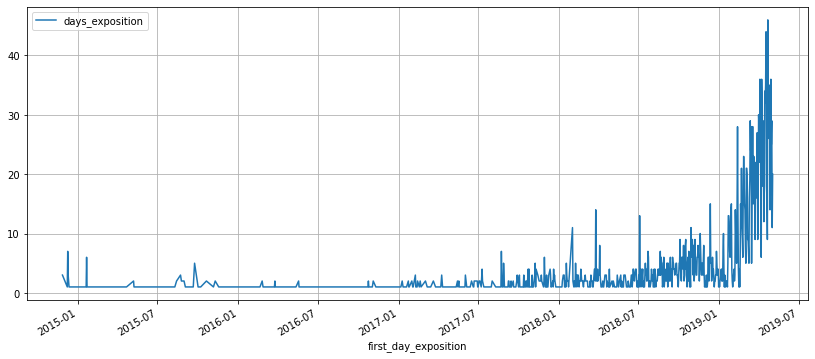

In [19]:
# теперь сравним с графиком количества пропусков на каждую дату
# для подсчета значений заменим пропуски на 0 и сделаем по ним срез
gaps_days_exposition = data.fillna(0)

(
    gaps_days_exposition.query('days_exposition == 0')
    .pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='count')
    .plot(grid=True, figsize=(14, 6))
)

Посмотрим статистику по столбцу days_exposition.

In [20]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

На графике пропусков в столбце days_exposition видно явное повышение с начала 2019 года, хотя на общем графике уровень количества публикаций даже немного уменьшился. Нужно учитывать, что часть квартир находились в стадии продажи. Среднее время публикации объявления (медиана) 95 дней, так что экспоненциальный рост в последние полгода вполне закономерен. Таким образом, пропуски в столбце days_exposition оставим без изменений.

In [21]:
print('Все пропуски после обработки:\n')
print(data.isna().sum())

Все пропуски после обработки:

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3180
dtype: int64


### 2.3 Изменение типа данных

Посмотрим типы данных в датафрейме.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

В процессе обработки пропусков были изменены типы данных в столбцах (в скобках на какой тип и почему):
- first_day_exposition (на datetime - столбец содержит значения даты и времени публикации объявления);  
- is_apartment (на bool - столбец содержит булевы значения относится ли тип квартиры к апартаментам);  
  
В столбце days_exposition изменить тип данных не получится, поскольку было решено оставить пропуски. 
  
Изменим тип данных в столбцах (в скобках на какой тип меняется и почему):  
- last_price (на int - столбец содержит целочисленные значения цены квартиры на момент снятия с публикации);   
- floors_total (на int - столбец содержит целочисленные значения этажей в доме);  
- balcony (на int - столбец содержит целочисленные значения количества балконов);  
- airports_nearest (на int - столбец содержит целочисленные значения расстояния до ближайшего аэропорта в метрах);  
- city_centers_nearest (на int - столбец содержит целочисленные значения расстояния до центра города в метрах);  
- parks_around_3000 (на int - столбец содержит целочисленные значения числа парков в радиусе 3 км);  
- ponds_around_3000 (на int - столбец содержит целочисленные значения числа водоёмов в радиусе 3 км); 
- parks_nearest (на int - столбец содержит целочисленные значения расстояния до ближайшего парка);  
- ponds_nearest(на int - столбец содержит целочисленные расстояния до ближайшего водоема в метрах);  

In [23]:
# для автоматизации процесса определим функцию astype_print()

'''
Функция astype_print(column, typ) изменяет тип данных в столбце, используя функцию astype(). 
И выводит сообщение об изменении типа данных.
Принимает два аргумента:
 - column - столбец, где нужно заменить тип данных;
 - typ - на какой тип данных меняется.
'''

def astype_print(column, typ):
    data[column] = data[column].astype(typ)
    print(f'Тип данных в столбце {column} изменен на: {typ}')

    
astype_print('last_price', 'int')
astype_print('floors_total', 'int')
astype_print('balcony', 'int')
astype_print('airports_nearest', 'int')
astype_print('city_centers_nearest', 'int')
astype_print('parks_around_3000', 'int')
astype_print('ponds_around_3000', 'int')
astype_print('parks_nearest', 'int')
astype_print('ponds_nearest', 'int')

Тип данных в столбце last_price изменен на: int
Тип данных в столбце floors_total изменен на: int
Тип данных в столбце balcony изменен на: int
Тип данных в столбце airports_nearest изменен на: int
Тип данных в столбце city_centers_nearest изменен на: int
Тип данных в столбце parks_around_3000 изменен на: int
Тип данных в столбце ponds_around_3000 изменен на: int
Тип данных в столбце parks_nearest изменен на: int
Тип данных в столбце ponds_nearest изменен на: int


### 2.4 Обработка дубликатов

Посмотрим уникальные значения в locality_name (название населённого пункта).

In [24]:
print('Уникальные значение в  locality_name до обработки:')
data['locality_name'].unique()

Уникальные значение в  locality_name до обработки:


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Имеются дубликаты, связанные с буквами "е" и "ё" ("поселок" и "поселок"), с добавлением к "поселку" наименований "коттеджный", "городского типа", "городской", "станции". Удалим их.

In [25]:
#замена "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

#уберем из названий "поселок городского типа", "городской", "коттеджный"  
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок', regex=True)

print('Уникальные значение в  locality_name до обработки:\n')
data['locality_name'].unique()

Уникальные значение в  locality_name до обработки:



array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Проверим данные на явные дубликаты и удалим их, при наличии.

In [26]:
print('Явных дубликатов до:', data.duplicated().sum())

# удалим дуликаты. Для сохранения порядка индексации применим функцию reset_index()
data = data.drop_duplicates().reset_index(drop=True)

print('Явных дубликатов после:', data.duplicated().sum())

Явных дубликатов до: 0
Явных дубликатов после: 0


### 2.5 Выводы  
  
1. Исправлен стиль заголовков в столбцах: city_centers_nearest, parks_around_3000, ponds_around_3000. 
2. Обработаны пропуски в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name,  airports_nearest, city_сenters_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition. Пропуски в столбце days_exposition оставлены без изменений, исходя из того, что объявления с ними относились к квартирам, еще находившимся в продаже.
3. Изменен тип данных в столбцах (в скобках на какой тип): last_price (int), first_day_exposition (datetime), floors_total (int), is_apartment (bool), balcony (int), airports_nearest (int), city_centers_nearest (int), ponds_around_3000 (int), ponds_nearest (int), parks_nearest (int), parks_around_3000 (int). В столбце days_exposition остался тип данных float, поскольку в нем остались пропуски.
4. Удалены неявные дубликаты в столбце locality_name.

## 3. Добавление в таблицу новых столбцов

Чтобы осуществить дальнейший сравнительный анализ параметров квартиры и изучить закономерности между ними, добавим в таблицу столбцы, содержащие дополнительные значения:  
- price_meter - цена квадратного метра
- ratio_living = отношение жилой к общей площади квартиры;  
- ratio_kitchen - отношение площади кухни к общей площади квартиры;  
- weekday_exposition - день недели публикации объявления;  
- month_exposition - месяц публикации объявления;  
- year_exposition - год публикации объявления;   
- floor_category - категория этажа квартиры (первый, последний, другой).

In [27]:
# сделаем рассчеты и добавим в таблицу соответствующие столбцы

# и сразу изменим тип значений столбца с ценой квадратного метра в целочисленный
data['price_meter'] = (data['last_price'] / data['total_area']).astype(int)
data['ratio_living_area'] = data['living_area'] / data['total_area']
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']

In [28]:
# добавим день недели, месяц и год публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year


# для категоризации значений этажа квартиры определим функцию floor_category

'''
Функция floor_category возвращает название категории для этажа квартиры.
В качестве аргумента принимает строку датафрейма.
'''

def floor_category(row):
    
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# создадим столбец floor_category
# для применения функции floor_category к столбцу используем функцию apply() c аргументом axis=1 (применить к строкам)
data['floor_category'] = data.apply(floor_category, axis=1)

In [29]:
data.sample(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,ratio_living_area,ratio_kitchen_area,weekday_exposition,month_exposition,year_exposition,floor_category
16811,18,4150000,43.0,2017-09-29,1,2.65,8,21.0,8,False,False,False,11.0,0,Санкт-Петербург,35979,16280,0,460,0,503,130.0,96511,0.488372,0.255814,4,9,2017,последний
1167,6,5000000,62.1,2018-10-09,3,3.00,6,42.0,2,False,False,False,8.7,0,Санкт-Петербург,19760,4969,1,790,1,280,119.0,80515,0.676329,0.140097,1,10,2018,другой


### 3.1 Вывод  
  
1. Для осуществления сравнительного анализа данных в основной датафрейм были добавлены новые столбцы: price_meter, ratio_living, ratio_kitchen, weekday_exposition, month_exposition, year_exposition, floor_category.

## 4. Исследовательский анализ данных

### 4.1. Изучение параметров квартиры  

Изучим распределение значений по следующим параметрам квартиры: 
- общая площадь,   
- цена на момент снятия с публикации,   
- число комнат,   
- высота потолков,  
- время продажи квартиры.  
  
Для этого посмотрим статистику, построим гистограммы и боксплоты для каждого параметра.

#### 4.1.1. Исследование total_area (площадь квартиры) 

In [30]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Text(0.5, 1.0, 'Общая площадь. Дапазон от 150 до 350 кв. м.')

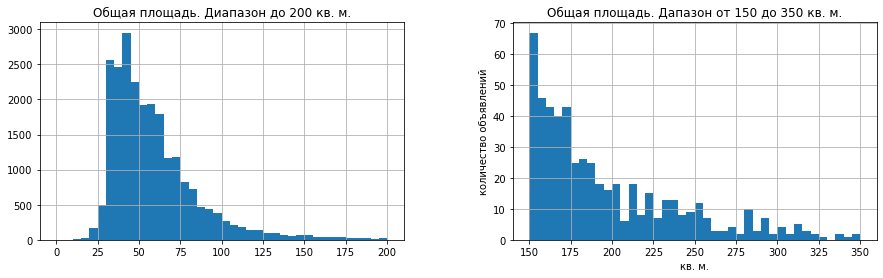

In [31]:
# для размещения графиков на одном уровне используем функцию subplots()
fig, axes = plt.subplots(1,2, figsize = (15,4))
plt.xlabel('кв. м.')
plt.ylabel('количество объявлений')

data.hist('total_area', bins=40, range=(0, 200), ax=axes[0])
axes[0].set_title('Общая площадь. Диапазон до 200 кв. м.')

data.hist('total_area', bins=40, range=(150, 350), ax=axes[1])
axes[1].set_title('Общая площадь. Дапазон от 150 до 350 кв. м.')

Text(0.5, 1.0, 'Общая площадь. Диапазон до 115 кв. м')

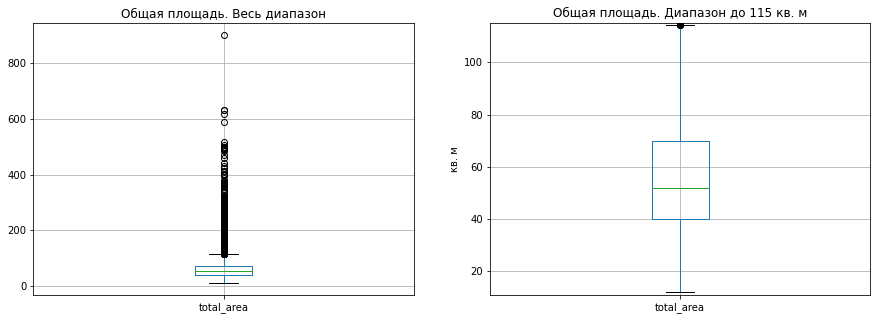

In [32]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
plt.ylabel('кв. м')

data.boxplot('total_area', ax=axes[0]) 
axes[0].set_title('Общая площадь. Весь диапазон')

plt.ylim(11, 115)
data.boxplot('total_area', ax=axes[1]) 
axes[1].set_title('Общая площадь. Диапазон до 115 кв. м')

Распределение сильно смещено в левую сторону. Основная часть значений площади квартиры находится от 20 до 115 кв. метров, медиана: 52. Резкий подъем начинается на 25 и суперскачок (с 500 до 2600 объявлений) на 30, что выглядит правдоподобным для площади квартиры. Анализ хвоста в диапазоне от 150 до 350 кв. м. показывает, что квартиры с площадью больше 250 метров - это большая редкость (среднее количество объявлений меньше 10). Значит значения меньше 25 и больше 250 можно отнести к аномальным.

#### 4.1.2. Исследование last_price (цена квартиры на момент снятия объявления с публикации)

In [33]:
data['last_price'].describe().astype(int)

count        23650
mean       6541126
std       10896399
min          12190
25%        3400000
50%        4650000
75%        6799000
max      763000000
Name: last_price, dtype: int32

Text(0, 0.5, 'количество объявлений')

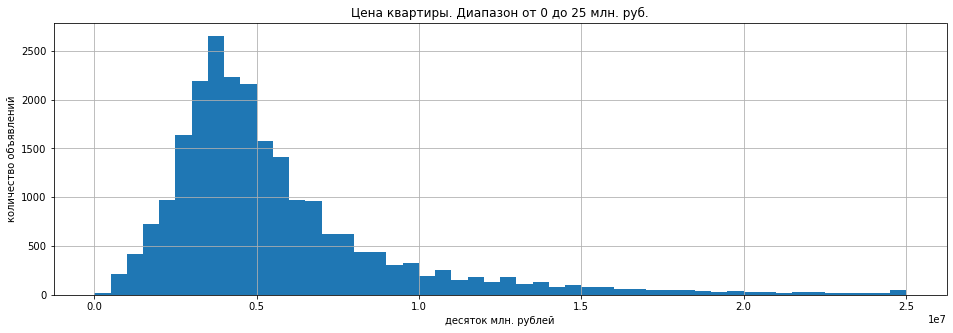

In [34]:
fig, ax = plt.subplots()
plt.title('Цена квартиры. Диапазон от 0 до 25 млн. руб.')
ax = data['last_price'].hist(bins=50, range=(0, 25000000), figsize = (16,5))
plt.xlabel('десяток млн. рублей')
plt.ylabel('количество объявлений')

Text(0, 0.5, 'количество объявлений')

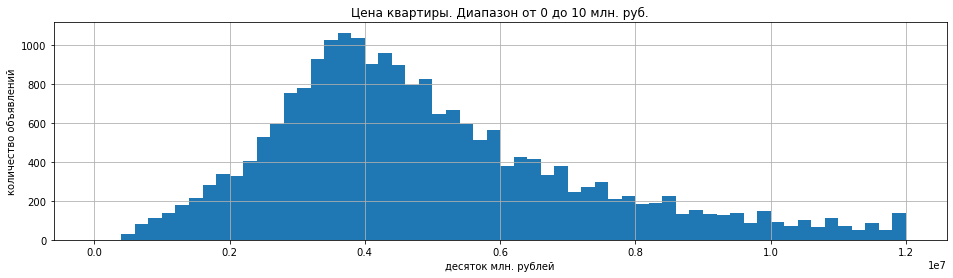

In [35]:
fig, ax = plt.subplots()
plt.title('Цена квартиры. Диапазон от 0 до 10 млн. руб.')
ax = data['last_price'].hist(bins=60, range=(0, 12000000), figsize = (16,4))
plt.xlabel('десяток млн. рублей')
plt.ylabel('количество объявлений')

Text(0.5, 1.0, 'Цена квартиры. Дапазон от 30 до 100 млн. руб.')

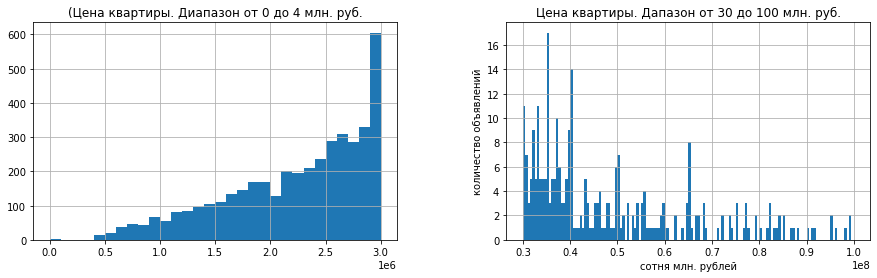

In [36]:
fig, axes = plt.subplots(1,2, figsize = (15,4))
plt.xlabel('сотня млн. рублей')
plt.ylabel('количество объявлений')

data.hist('last_price', bins=30, range=(0, 3000000), ax=axes[0])
axes[0].set_title('(Цена квартиры. Диапазон от 0 до 4 млн. руб.')

data.hist('last_price', bins=140, range=(30000000, 100000000), ax=axes[1])
axes[1].set_title('Цена квартиры. Дапазон от 30 до 100 млн. руб.')

Text(0.5, 1.0, 'Цена квартиры. Диапазон до 12.000.000 руб.')

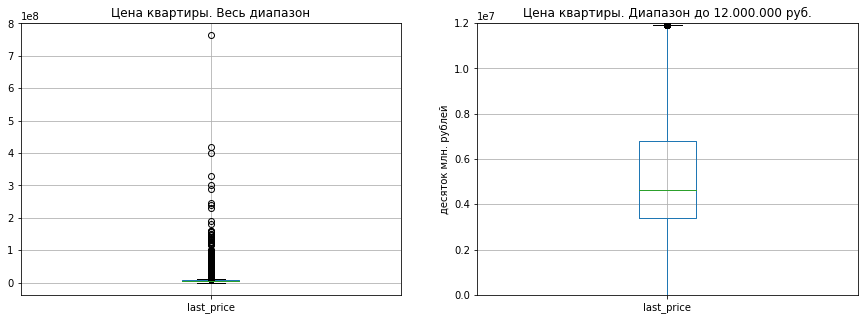

In [37]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
plt.ylabel('десяток млн. рублей')

data.boxplot('last_price', ax=axes[0]) 
axes[0].set_title('Цена квартиры. Весь диапазон')

plt.ylim(0, 12000000)
data.boxplot('last_price', ax=axes[1]) 
axes[1].set_title('Цена квартиры. Диапазон до 12.000.000 руб.')

Распределение сильно смещено в левую сторону. Основная часть значений цены квартиры находится в диапазоне от 3,4 до 10 млн., медиана: 4,6 млн. Анализ левого хвоста показывает, что рост цен начинается с нуля и идет равномерно до выраженного подъема на значении 1,5 млн., после которого усиливается. Возьмем в качестве минимальной стоимость квартиры с 1,5 млн., как наиболее правдоподобную (учитывая тот факт, что первые продажи начались еще в 2014 году). Анализ цен в диапазоне от 30 до 100 млн. показывает, что количество объявлений квартир, стоимостью выше 60 млн. в среднем меньше, чем 2. Значит значения больше 60 можно отнести к аномальным.

#### 4.1.3. Исследование rooms (число комнат) 

In [38]:
data['rooms'].describe().astype(int)

count    23650
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int32

Text(0, 0.5, 'количество объявлений')

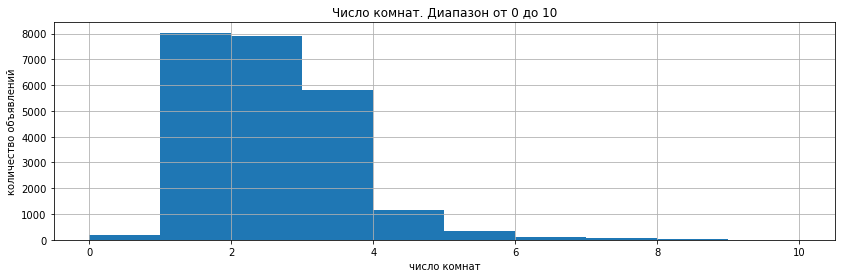

In [39]:
fig, ax = plt.subplots()
plt.title('Число комнат. Диапазон от 0 до 10')
ax = data['rooms'].hist(bins=10, range=(0, 10), figsize = (14,4))
plt.xlabel('число комнат')
plt.ylabel('количество объявлений')

Text(0.5, 1.0, 'Число комнат. Диапазон от 0 до 8')

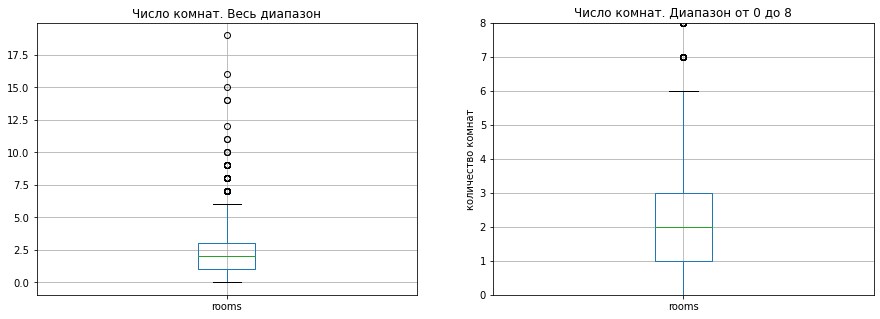

In [40]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
plt.ylabel('количество комнат')

data.boxplot('rooms', ax=axes[0]) 
axes[0].set_title('Число комнат. Весь диапазон')

plt.ylim(0, 8)
data.boxplot('rooms', ax=axes[1]) 
axes[1].set_title('Число комнат. Диапазон от 0 до 8')

Распределение смещено в левую сторону. Основная часть значений числа комнат находится от 1 до 6, медиана: 2. Значения меньше 1 и больше 6 отнесем к аномальным.

#### 4.1.4. Исследование ceiling_height (высота потолков) 

In [41]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'количество объявлений')

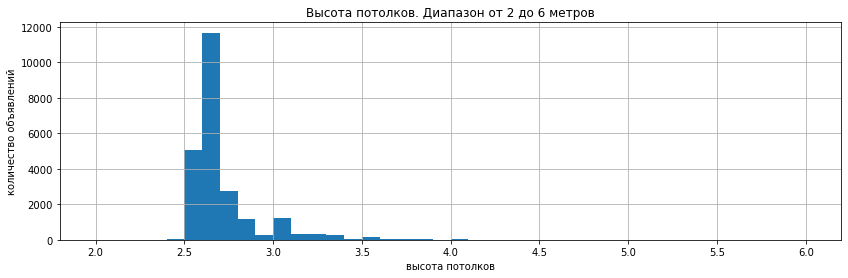

In [42]:
fig, ax = plt.subplots()
plt.title('Высота потолков. Диапазон от 2 до 6 метров')
ax = data['ceiling_height'].hist(bins=40, range=(2, 6), figsize = (14,4))
plt.xlabel('высота потолков')
plt.ylabel('количество объявлений')

Text(0.5, 1.0, 'Высота потолков. Диапазон от 2,4 до 2,9 метров')

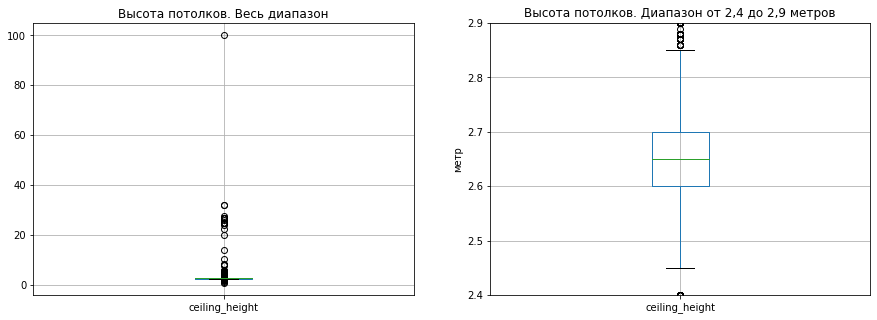

In [43]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
plt.ylabel('метр')

data.boxplot('ceiling_height', ax=axes[0]) 
axes[0].set_title('Высота потолков. Весь диапазон')

plt.ylim(2.4, 2.9)
data.boxplot('ceiling_height', ax=axes[1]) 
axes[1].set_title('Высота потолков. Диапазон от 2,4 до 2,9 метров')

Распределение с выраженным пиком на 2,5 и еще более выраженном на 2,6 и длинным хвостом из отдельных значений вплоть до 100 метров. Основная часть значений находится в диапазоне от 2,5 до 3, медиана: 2,65. Значения меньше 2,4 и больше 3 отнесем к аномальным.

#### 4.1.5. Исследование days_exposition (время продажи квартиры (сколько дней было размещено объявление)) 

In [44]:
data['days_exposition'].describe().astype(int)

count    20470
mean       180
std        219
min          1
25%         45
50%         95
75%        231
max       1580
Name: days_exposition, dtype: int32

In [45]:
data.query('days_exposition == 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,ratio_living_area,ratio_kitchen_area,weekday_exposition,month_exposition,year_exposition,floor_category


Text(0, 0.5, 'количество объявлений')

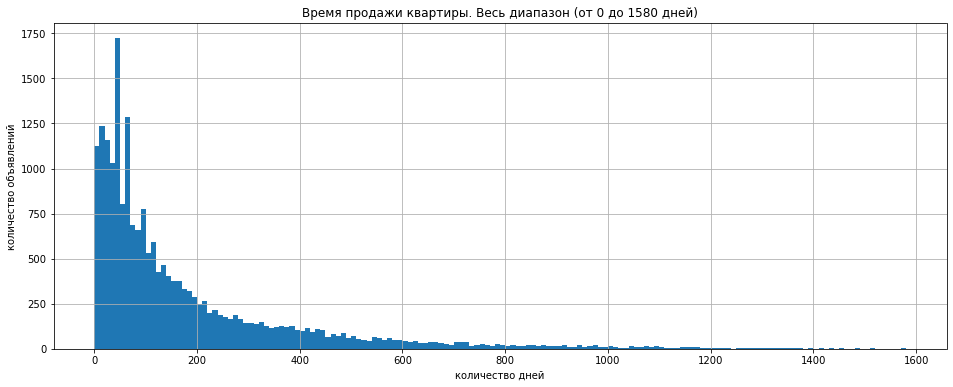

In [46]:
fig, ax = plt.subplots()
plt.title('Время продажи квартиры. Весь диапазон (от 0 до 1580 дней)')
ax = data['days_exposition'].hist(bins=158, range=(0, 1580), figsize = (16,6))
plt.xlabel('количество дней')
plt.ylabel('количество объявлений')

Text(0.5, 1.0, 'Цена квартиры. Дапазон от 600 до 1500 дней')

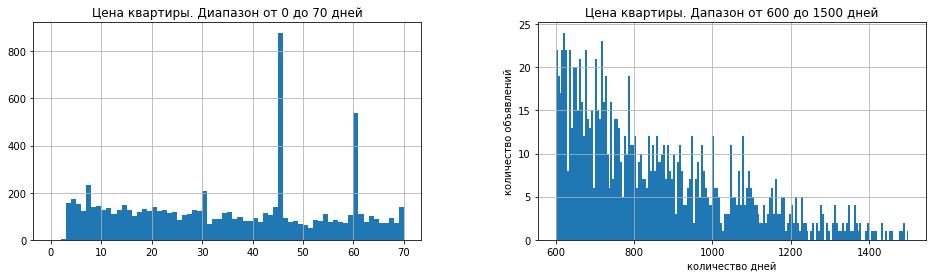

In [47]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
plt.xlabel('количество дней')
plt.ylabel('количество объявлений')

data.hist('days_exposition', bins=70, range=(0, 70), ax=axes[0])
axes[0].set_title('Цена квартиры. Диапазон от 0 до 70 дней')

data.hist('days_exposition', bins=180, range=(600, 1500), ax=axes[1])
axes[1].set_title('Цена квартиры. Дапазон от 600 до 1500 дней')

Text(0.5, 1.0, 'Время продажи квартиры. Диапазон от 0 до 511 дней')

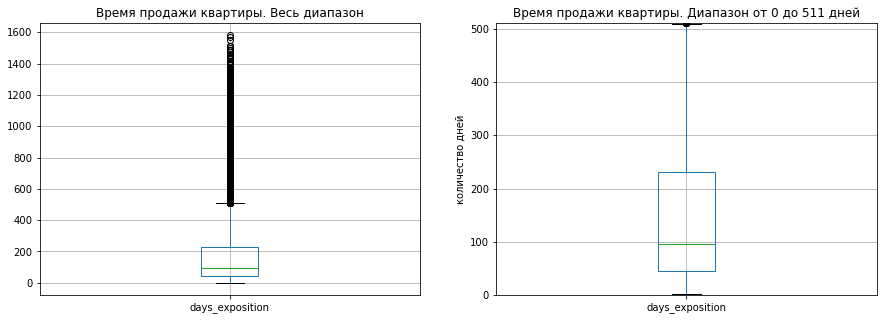

In [48]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
plt.ylabel('количество дней')

data.boxplot('days_exposition', ax=axes[0]) 
axes[0].set_title('Время продажи квартиры. Весь диапазон')

plt.ylim(0, 511)
data.boxplot('days_exposition', ax=axes[1]) 
axes[1].set_title('Время продажи квартиры. Диапазон от 0 до 511 дней')

Распределение похоже на распределение Пуассона, что может указывать на корректность данных (чем больше времени проходит с момента публикации, тем меньше объявлений остается опубликованными - чем больше времени квартира в продаже, тем больше вероятность, что квартира будет продана). Основная часть значений находится в диапазоне от 3 до 510 дней, медиана: 95, среднее: 180. Быстрой продажей можно считать квартиру, проданную в пределах 45 дней, а долгой - с 230 дня размещения объявления. Количество объявлений в публикации более 800 дней падает до значения менее 10. Значения до 3 и после 800 дня можно признать аномальными.  
В основном распределении есть два выброса: на 45 и 60.

### 4.2. Выводы  <a id='flats_parameters'></a>
  
1. Анализ данных столбца total_area показал, что основная часть значений общей площади квартиры распределена равномерно, не смотря на длинный хвост справа. Медиана: 52 м2. Значения меньше 25 и больше 250 отнесены к аномальным.  
2. Анализ данных столбца last_price показал, что основная часть значений цены квартиры на момент снятия с публикации распределена равномерно, не смотря на длинный хвост справа. Медиана: 4,6 млн. руб. Значения меньше 1,5 млн. и больше 60 млн. отнесены к аномальным.
3. Анализ данных столбца  rooms показал, что основная часть значений количества комнат распределена равномерно. Распределение смещено в левую сторону. Медиана: 2 комнаты. Значения меньше 1 и больше 6 отнесены к аномальным.
4. Анализ данных столбца ceiling_height показал, что основная часть значений высоты потолков стремится к пиковому распределению в диапазоне от 2,5 до 2,6. Медиана: 2,65 метра. Значения меньше 2,4 и больше 3 отнесены к аномальным.
5. Анализ данных столбца days_exposition показал, что распределение значений дней продажи квартиры напоминает распределение Пуассона, что может указывать на корректность данных. Медиана: 95 дней. Быстрой продажей можно считать квартиру, проданную в пределах 45 дней, а долгой - с 230 дня размещения объявления. Значения меньше 3 и больше 800 отнесены к аномальным. Имеются выбросы на 45 и 60 значении.

### 4.3. Обработка редких и выбивающихся значений.  
  
Уберем редкие и выбивающиеся значения, согласно выводу по исследованию параметров квартиры выше.  
Перед каждой операцией очистки будем проверять долю остающихся данных от изначального их объема.

#### 4.3.1 Обработка столбца total_area

In [49]:
# доля объявлений с площадью менее 25 м2 и свыше 250м2.
print(len(data.query('total_area >= 25 and total_area <= 250')) / len(data))

0.98723044397463


In [50]:
# срез нового диапазона значений (общая площадь квартиры менее 25 м2 и свыше 250 м2) столбца total_area сохраним в переменную good_data
good_data = data.query('total_area >= 25 and total_area <= 251')

In [51]:
good_data['total_area'].describe()

count    23353.000000
mean        59.306848
std         28.943295
min         25.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        251.000000
Name: total_area, dtype: float64

#### 4.3.2. Обработка столбца last_price

In [52]:
# доля объявлений с ценой квартиры меньше 1,5 млн. и выше 60 млн. рублей
print(len(good_data.query('last_price >= 1500000 and last_price <= 60000000')) / len(data))

0.9583086680761099


In [53]:
# удалим объявления с ценой квартиры меньше 1,5 млн. и выше 60 млн. рублей
good_data = good_data.query('last_price >= 1500000 and last_price <= 60000000')

In [54]:
good_data['last_price'].describe().astype(int)

count       22664
mean      6151407
std       5046152
min       1500000
25%       3530000
50%       4700000
75%       6800000
max      59534892
Name: last_price, dtype: int32

#### 4.3.3. Обработка столбца rooms

In [55]:
# доля объявлений с количеством комнат менее 1 и свыше 6
print(len(good_data.query('rooms >= 0 and rooms <= 6')) / len(data))

0.9561522198731501


In [56]:
# удалим объявления с количеством комнат менее 1 и свыше 6
good_data = good_data.query('rooms >= 0 and rooms <= 6')

In [57]:
good_data['rooms'].describe()

count    22613.000000
mean         2.056826
std          0.990937
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

#### 4.3.4. Обработка столбца ceiling_height

In [58]:
# доля объявлений высотой потолков меньше 2,4 и больше 3 метров
print(len(good_data.query('ceiling_height >= 2.4 and ceiling_height <= 3')) / len(data))

0.8955602536997885


In [59]:
# удалим объявления с высотой потолков меньше 2,4 и больше 3 метров
good_data = good_data.query('ceiling_height >= 2.4 and ceiling_height <= 3')

In [60]:
good_data['ceiling_height'].describe()

count    21180.000000
mean         2.653456
std          0.116957
min          2.400000
25%          2.600000
50%          2.650000
75%          2.650000
max          3.000000
Name: ceiling_height, dtype: float64

#### 4.3.5. Обработка столбца days_exposition

In [61]:
# доля объявлений со сроком публикации менее 3 и свыше 800 дней.
print(len(good_data.query('days_exposition >= 3 and days_exposition <= 800')) / len(data))

0.7613530655391121


In [62]:
# удалим объявления с ценой квартиры меньше 1,5 млн. и выше 60 млн. рублей и выбросы на 45 и 60 значении
good_data = good_data.query('days_exposition >= 3 and days_exposition <= 800')

In [63]:
good_data['days_exposition'].describe()

count    18006.000000
mean       152.077807
std        162.214860
min          3.000000
25%         43.000000
50%         90.000000
75%        205.000000
max        800.000000
Name: days_exposition, dtype: float64

### 4.4. Вывод  
  
1. Был создан новый датафрейм good_data, который содержит очищенные от выбросов данные изначального датафрейма data (осталось 75% от изначального объема) по столбцам: total_area, last_price, rooms, ceiling_height, days_exposition в диапазонах согласно [выводам раздела "Изучение параметров квартиры"](#flats_parameters)

### 4.5. Факторы, больше всего влияющие на стоимость квартиры.  
  
Изучим, зависит ли цена от:   
1) площади,  
2) числа комнат,   
3) удалённости от центра,  
4) на каком этаже расположена квартира: первом, последнем или другом,   
5) от даты размещения: дня недели, месяца и года.  

#### 4.5.1. Связь цены c общей площадью, количеством комнат и удаленностью от центра

Чтобы оценить степени корреляции между этими параметрами, построим диаграммы рассеяния и рассчитаем коэффициент корреляции Пирсона.

In [64]:
# для автоматизации и повышения удобства восприятия информации определим функцию scatter_corr()

'''
Функция scatter_corr (dataframe, variable_1, variable_2, text) строит диаграмму рассеяния 
и выводит сообщение с коэффициентом корреляции Пирсона между двумя переменными. 
Принимает четыре аргумента:
 - dataframe - датафрейм, к которому применяются функции;
 - variable_1 - первая переменная (на оси X);
 - variable_2 - вторая переменная (на оси Y);
 - text - текст в названиях графика и в сообщении.
'''

def scatter_corr(dataframe, variable_1, variable_2, text):
    dataframe.plot(x=variable_1, y=variable_2, kind='scatter', alpha=0.7, figsize = (5, 5), 
          title= f'Корреляция {text}')
    print(f'Коэффициент корреляции Пирсона {text} равен:', 
          dataframe[variable_1].corr(dataframe[variable_2]))

Коэффициент корреляции Пирсона цены и общей площади равен: 0.7516540196254524
Коэффициент корреляции Пирсона цены и количества комнат равен: 0.44919053924934704
Коэффициент корреляции Пирсона цены и удалённости от центра равен: -0.2508937401005332


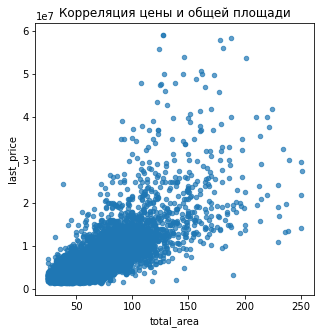

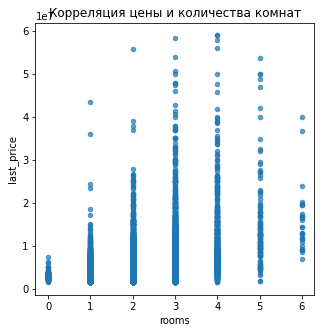

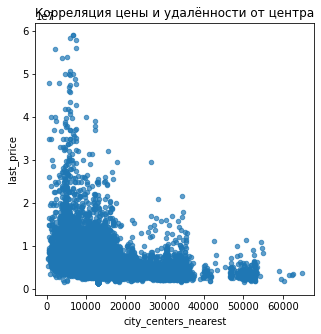

In [65]:
# построим диаграммы рассеяния для цены и трех параметров: общей площади, количеством комнат и удалённостью от центра 
scatter_corr(good_data, 'total_area', 'last_price', 'цены и общей площади')
scatter_corr(good_data, 'rooms', 'last_price', 'цены и количества комнат')
scatter_corr(good_data, 'city_centers_nearest', 'last_price', 'цены и удалённости от центра')

#### 4.5.2. Связь цены c этажом, на котором расположена квартира.

<function matplotlib.pyplot.legend(*args, **kwargs)>

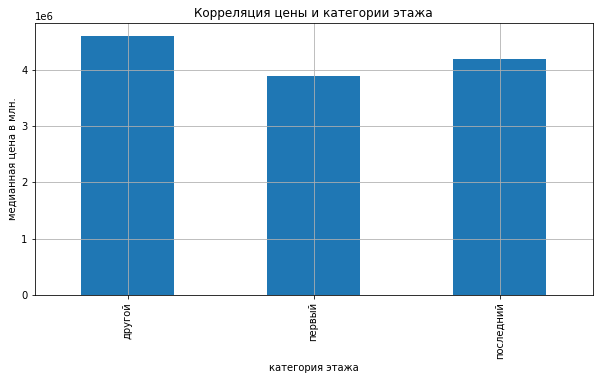

In [66]:
# cгруппируем по категориям этажа квартиры в сравнении с медианной ценой
price_floor = good_data.groupby('floor_category')['last_price'].median()

# и построим стобчатую диаграмму 
fig, axes = plt.subplots(figsize = (10,5))
price_floor.plot(kind='bar', grid=True, title = 'Корреляция цены и категории этажа')
plt.xlabel('категория этажа')
plt.ylabel('медианная цена в млн.')
plt.legend

#### 4.5.3. Связь цены и даты размещения объявления

<function matplotlib.pyplot.legend(*args, **kwargs)>

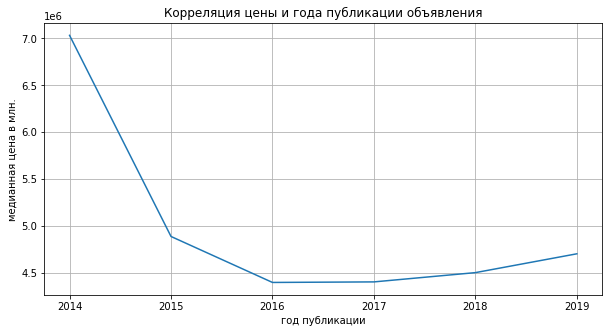

In [67]:
# cгруппируем по дате публикации в сравнении с медианной ценой
price_year = good_data.groupby('year_exposition')['last_price'].median()

# для визуализации медианной цены по годам пудликации объявления используем классический график  
fig, axes = plt.subplots(figsize = (10,5))
price_year.plot(grid=True, title = 'Корреляция цены и года публикации объявления')
plt.xlabel('год публикации')
plt.ylabel('медианная цена в млн.')
plt.legend

2014 год имеет явное отличие от остальных годов. Посмотрим какой процент публикаций был опубликован в этом году, чтобы оценить значимость этой части данных.

In [68]:
len(good_data.query('year_exposition == 2014')) / len(good_data)

0.0022214817283127846

Значение данных ничтожно, меньше трети процента. Поэтому исключим их из анализа, чтобы не искажали картину.

<function matplotlib.pyplot.legend(*args, **kwargs)>

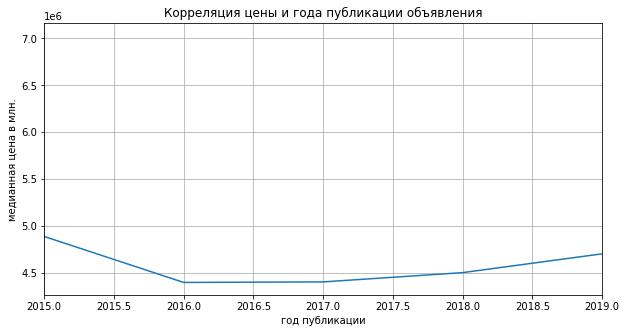

In [69]:
# cгруппируем по дате публикации в сравнении с медианной ценой
price_year = good_data.groupby('year_exposition')['last_price'].median()

# используем атрибут xlim для задания диапазона 
fig, axes = plt.subplots(figsize = (10,5))
price_year.plot(grid=True, xlim=(2015, 2019), title = 'Корреляция цены и года публикации объявления')
plt.xlabel('год публикации')
plt.ylabel('медианная цена в млн.')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

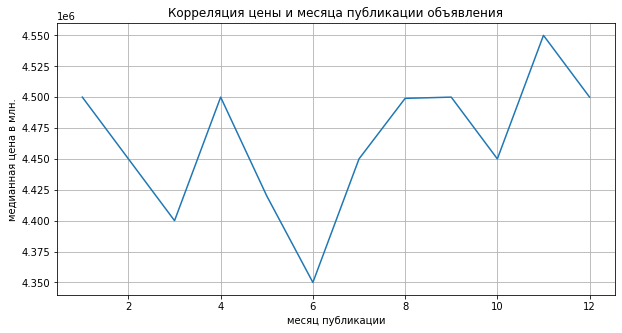

In [70]:
# cгруппируем по дате публикации в сравнении с медианной ценой
price_month = good_data.groupby('month_exposition')['last_price'].median()

# построим график  
fig, axes = plt.subplots(figsize = (10,5))
price_month.plot(grid=True, title = 'Корреляция цены и месяца публикации объявления')
plt.xlabel('месяц публикации')
plt.ylabel('медианная цена в млн.')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

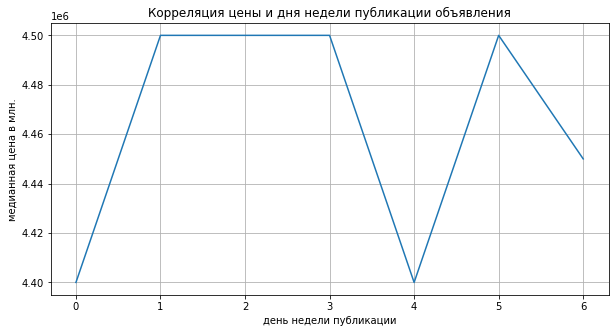

In [71]:
# cгруппируем по дате публикации в сравнении с медианной ценой
price_weekday = good_data.groupby('weekday_exposition')['last_price'].median()

# построим график  
fig, axes = plt.subplots(figsize = (10,5))
price_weekday.plot(grid=True, title = 'Корреляция цены и дня недели публикации объявления')
plt.xlabel('день недели публикации')
plt.ylabel('медианная цена в млн.')
plt.legend

### 4.6. Выводы  

Стоимость квартиры имеет:
 - выраженную положительную взаимосвязь с общей площадью (коэффициент корреляции Пирсона 0,75);  
 - выраженную взаимосвязь с удаленностью от центра: большая часть очень дорогих квартир (от 25 до 60 млн) находится до 15 км, после 25 км стоимость большей части квартир ниже 10 млн; 
 - выраженную связь с количеством комнат: цена квартиры растет с увеличением количества комнат до 3х и падает, начиная с 4-х комнатных квартир;  
 - среднюю взаимосвязь с этажом квартиры: медианная стоимость квартир ниже всего для первого этаже, выше для последнего и наиболее высокая для квартир с этажами между первым и последним;  
 - незначительную взаимосвязь с годом публикации, характеризующуюся небольшим колебанием медианной цены с 4,4 до 4,5 млн. в период с 2016 по 2018. В 2015 и после 2018 медианная цена выше, но процент количества объявлений, опубликованных в эти года незначителен (0,3 и 0,5% соответственно), чем можно изменить искажение медианы. 2014 год и вовсе был исключен из анализа из-за аномальных значений и ничтожно малого процента объявлений (0,002%);   
 - выраженную взаимосвязь с месяцем публикации, характеризующуюся резким падением среднегодовой медианной стоимости в 4,5 млн. до 4,35 млн в июне и подъемом до 4,6 млн. в ноябре;  
 - минимальную взаимосвязь с днем недели публикации, характеризующуюся несколькими колебаниями - в понедельник и пятницу медианная цена квартиры падает на 100.000 руб., в воскресенье на 50.000.

### 4.7. Топ-10 населенных пунктов  

Найдем 10 населённых пунктов с наибольшим количеством объявлений, посчитаем среднюю цену квадратного метра и выделем населённые пункты с самой высокой и низкой стоимостью жилья. 

#### 4.7.1. Десять населённых пунктов с наибольшим количеством объявлений.  

Составим рейтинг 10 населённых пунктов по количеству объявлений.

In [72]:
# создадим список топ-10 городов по количеству объявлений
top_10 = good_data['locality_name'].value_counts().sort_values(ascending=False).head(10).index

# посмотрим этот рейтинг отдельно
good_data['locality_name'].value_counts().head(10)

Санкт-Петербург      12031
поселок Мурино         505
поселок Шушары         395
Всеволожск             320
поселок Парголово      295
Колпино                294
Пушкин                 281
деревня Кудрово        277
Гатчина                251
Выборг                 179
Name: locality_name, dtype: int64

In [73]:
good_data['locality_name'].value_counts().sum()

18006

#### 4.7.2. Медианная, максимальная и минимальная стоимость квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений.

Посмотрим на медианную, максимальную и минимальную стоимость квадратного метра в городах из топ-10.

In [74]:
# перезапишем столбец с ценой квадтраного метра по очищенным данным, сохраненным good_data
good_data['price_meter'] = (good_data['last_price'] / good_data['total_area']).astype(int)

# создадим сводную таблицу с медианной, максимальной и минимальной стоимостью квадратного метра в городах из топ-10

print('Медианная, максимальная и минимальная стоимость квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений\n')
top_10_tab = good_data.query('locality_name in @top_10').pivot_table(index='locality_name', values='price_meter', 
                                                                     aggfunc=['median', 'max', 'min'])

# переименование столбцов для удобства восприятия
top_10_tab.columns = ['Медианная цена', 'Максимальная цена', 'Минимальная цена']
top_10_tab

Медианная, максимальная и минимальная стоимость квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений



,Медианная цена,Максимальная цена,Минимальная цена
locality_name,,,
Всеволожск,65789.0,640422,31400
Выборг,57432.0,85227,33547
Гатчина,67695.0,105818,45238
Колпино,73820.5,125000,47957
Пушкин,97625.0,256521,59836
Санкт-Петербург,102173.0,462745,15345
деревня Кудрово,91428.0,142857,54160
поселок Мурино,84375.0,138580,50000
поселок Парголово,91346.0,138522,48405


<function matplotlib.pyplot.legend(*args, **kwargs)>

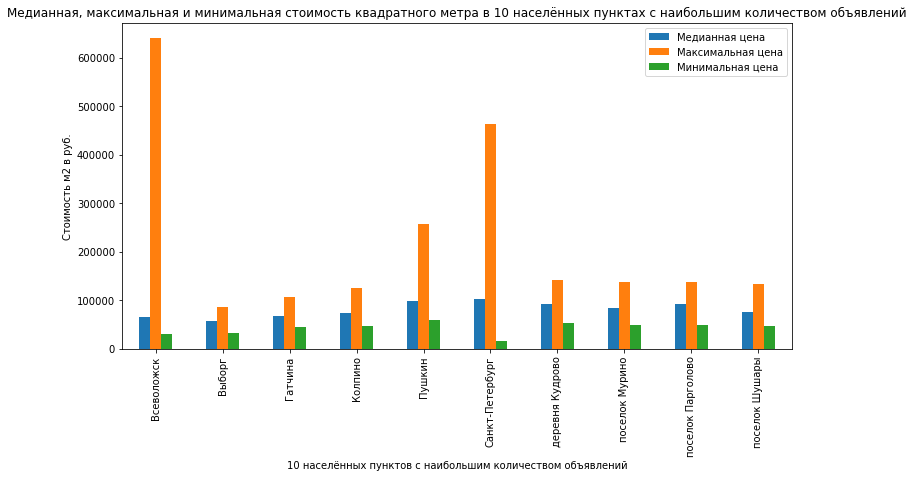

In [75]:
# столбчатая диаграмма по сводной таблице
top_10_tab.plot(kind='bar', figsize=(12, 6)) 
plt.title('Медианная, максимальная и минимальная стоимость квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений')
plt.xlabel('10 населённых пунктов с наибольшим количеством объявлений')
plt.ylabel('Стоимость м2 в руб.')
plt.legend

### 4.8. Выводы

1. По количеству объявлений вне конкуренции Санкт-Петербург (85% топ-10 и 81% всего датасета).  
2. По медианной стоимости м2 в топ-10 населенных пунктов по количеству объявлений также лидер Санкт-Петербург (102.124 руб.), следом за ним идет Пушкин (97.625). Наверху еще два населенных пункта, но с большим отставанием - деревня Кудрово (91.155) и поселок Парголово (91.387).  
3. Первый по максимальной стоимости м2 неожиданно Всеволжск (640.422), следом за ним Санкт-Петербург (552.000) и с большим отрывом Пушкин (256.521).  
4. По минимальной стоимости м2 вне конкуренции Санкт-Петербург (15345), далее идут Всеволожск (31400) и Выборг (33547).

### 4.9. Сравнительный анализ квартир в центре Санкт-Петербурга и квартир во всем Санкт-Петербурге и области.

Изучим как цена зависит от удалённости от центра. Изучим также параметры квартир в центре: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). И сравним выводы по центру с общими выводами по всем объявлениям (в датасете с данными, очищенными от выбросов).

#### 4.9.1. Определение области центра Санкт-Петербурга.

Добавим в датарейм столбец с расстояниями до центра в километрах.

In [76]:
# значения столбца city_centers_nearest разделим на 1000 и округлим, полученные числа
good_data['to_center_km'] = (good_data['city_centers_nearest'] / 1000).round().astype(int)
good_data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,ratio_living_area,ratio_kitchen_area,weekday_exposition,month_exposition,year_exposition,floor_category,to_center_km
20820,1,11879250,70.5,2018-03-15,2,2.65,13,36.15,12,False,False,False,12.35,2,Санкт-Петербург,27314,6017,1,658,3,592,34.0,168500,0.512766,0.175177,3,3,2018,другой,6


Посчитаем медиану стоимости квартир для каждого километра и построим график связи цены и удалённости от центра.

<function matplotlib.pyplot.legend(*args, **kwargs)>

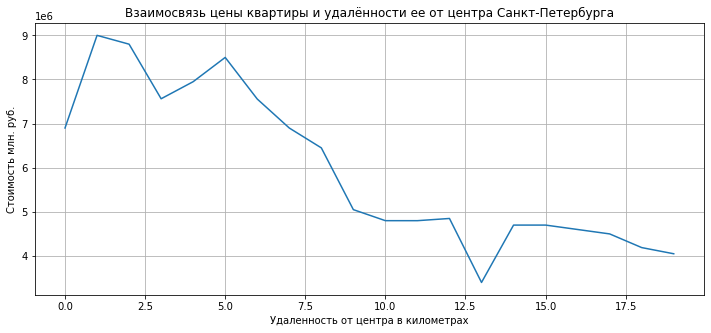

In [77]:
# ограничим расстояние от центра 20 км, чтобы изучить данные детальнее
to_center = good_data.query('to_center_km < 20').groupby('to_center_km')['last_price'].median()

# и построим по срезу график
plt.figure(figsize=(12, 5))
to_center.plot(x='to_center_km', y='price_meter', grid=True)
plt.xlabel('Удаленность от центра в километрах')
plt.ylabel('Стоимость млн. руб.')
plt.title('Взаимосвязь цены квартиры и удалённости ее от центра Санкт-Петербурга')
plt.legend

На графике видно как стоимость квартир резко падает на расстоянии после 5 км от центра. Значит определим область центра Санкт-Петербурга расстояние от центра до 5 км. Сохраним срез данных с удаленностью до 5 км в отдельную переменную.

In [78]:
spb_center = good_data.query('to_center_km <= 5')
len(spb_center)

1221

#### 4.9.2. Общая площадь.

Для автоматизации и повышения удобства восприятия информации определим функцию double_plot().

In [79]:
'''
Функция double_plot(column, name) строит распределения по двум столбцам таблицы на одном графике. 
Принимает два аргумента:
 - column - имя столбца;
 - name - название параметра, для которого строится график.
'''

def double_plot(column, name):
    try:
        fig = plt.subplots(figsize = (12,5))
        plt.xlabel(name)
        plt.ylabel('плотность распределения')
        plt.title(f"{name}. Сравнение центра со всем городом и областью")
        sns.kdeplot(good_data[column], shade=True, label="Спб и соседние нас. пункты")
        sns.kdeplot(spb_center[column], shade=True, label="Центр Санкт-Петербурга")
        plt.legend()
    except:
        print('апшипка')

Сравним статистические показатели, боксплоты и графики распределения по двум датасетам для каждого параметра.

In [80]:
print('Центр Санкт-Петербурга:\n\n', spb_center['total_area'].describe().astype(int))
print()
print('Санкт-Петербург и соседние населенные пункты:\n\n', good_data['total_area'].describe().astype(int))

Центр Санкт-Петербурга:

 count    1221
mean       80
std        36
min        25
25%        53
50%        73
75%        97
max       251
Name: total_area, dtype: int32

Санкт-Петербург и соседние населенные пункты:

 count    18006
mean        55
std         23
min         25
25%         39
50%         50
75%         65
max        251
Name: total_area, dtype: int32


(0.0, 105.0)

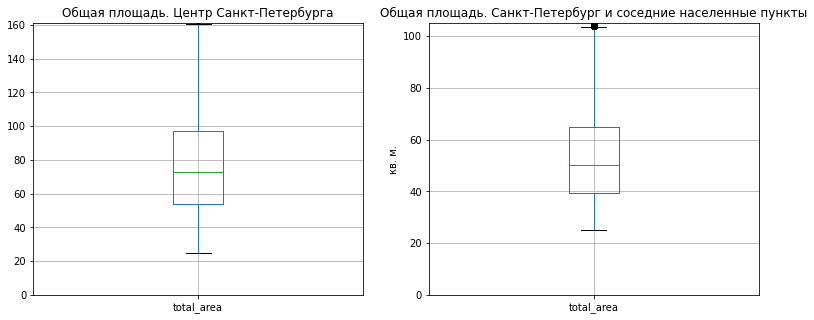

In [81]:
fig, axes = plt.subplots(1,2, figsize = (13,5))
plt.ylabel('кв. м.')

spb_center.boxplot('total_area', ax=axes[0]) 
axes[0].set_title('Общая площадь. Центр Санкт-Петербурга')
axes[0].set_ylim([0, 161])

good_data.boxplot('total_area', ax=axes[1]) 
axes[1].set_title('Общая площадь. Санкт-Петербург и соседние населенные пункты')
axes[1].set_ylim([0, 105])


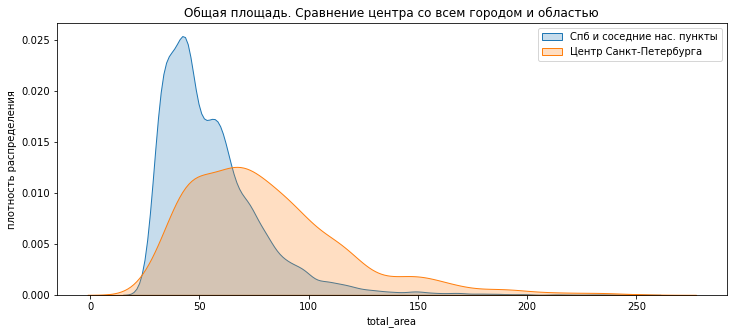

In [82]:
double_plot('total_area', 'Общая площадь')

Распределение площади квартир в центре отличается от распределения по всем данным большим разнообразием, большей представленностью квартир с площадью, выше медианной и меньшим с площадью ниже медианной. Основная часть значений: от 54 до 97 м2 (все данные - 39-65), медиана: 73 (50). Из чего можно сделать вывод, что квартиры в центре в среднем больше и разнообразнее по размерам.

#### 4.9.3. Цена.

In [83]:
print('Центр Санкт-Петербурга:\n\n', spb_center['last_price'].describe().astype(int))
print()
print('Санкт-Петербург и соседние населенные пункты:\n\n', good_data['last_price'].describe().astype(int))

Центр Санкт-Петербурга:

 count        1221
mean     10375432
std       6855957
min       1600000
25%       6350000
50%       8400000
75%      11997000
max      55845000
Name: last_price, dtype: int32

Санкт-Петербург и соседние населенные пункты:

 count       18006
mean      5471114
std       3995287
min       1500000
25%       3449250
50%       4490000
75%       6150000
max      59000000
Name: last_price, dtype: int32


(1400000.0, 10300000.0)

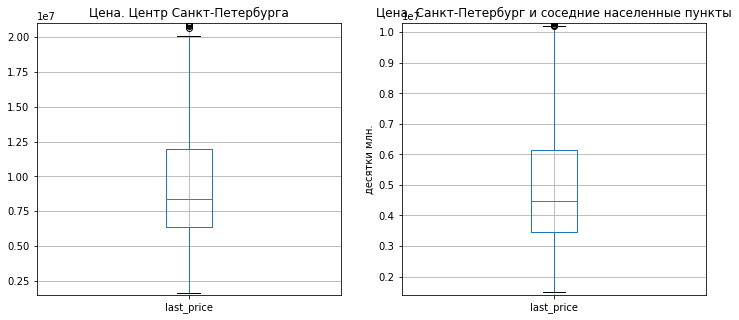

In [84]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
plt.ylabel('десятки млн.')

spb_center.boxplot('last_price', ax=axes[0]) 
axes[0].set_title('Цена. Центр Санкт-Петербурга')
axes[0].set_ylim([1500000, 21000000])

good_data.boxplot('last_price', ax=axes[1]) 
axes[1].set_title('Цена. Санкт-Петербург и соседние населенные пункты')
axes[1].set_ylim([1400000, 10300000])


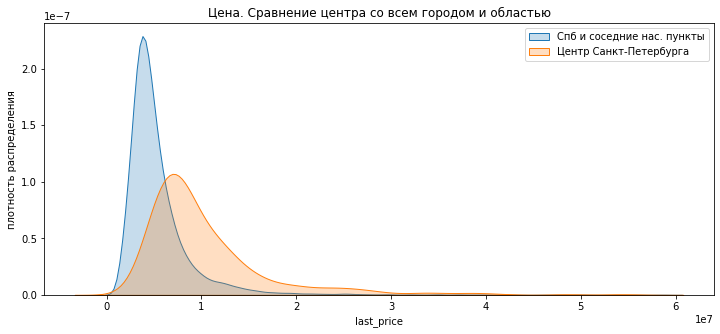

In [85]:
double_plot('last_price', 'Цена')

Распределение цен квартир в центре отличается от распределения по всем данным большим разнообразием, большей представленностью квартир с ценой выше медианной и меньшим с ценой ниже медианной. Основная часть значений: от 6,4 до 12 млн. (все данные - 3,4-6,2), медиана: 8,4 (4,5). Из чего можно сделать вывод, что квартиры в центре в среднем дороже и разнообразнее по ценам.

#### 4.9.4. Количество комнат. 

In [86]:
print('Центр Санкт-Петербурга:\n\n', spb_center['rooms'].describe().astype(int))
print()
print('Санкт-Петербург и соседние населенные пункты:\n\n', good_data['rooms'].describe().astype(int))

Центр Санкт-Петербурга:

 count    1221
mean        2
std         1
min         0
25%         2
50%         3
75%         3
max         6
Name: rooms, dtype: int32

Санкт-Петербург и соседние населенные пункты:

 count    18006
mean         1
std          0
min          0
25%          1
50%          2
75%          3
max          6
Name: rooms, dtype: int32


(1.0, 6.0)

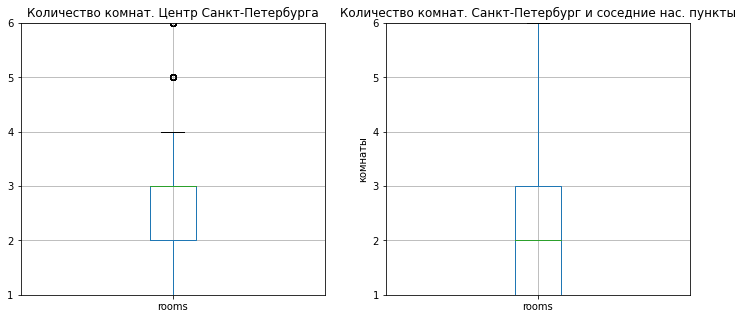

In [87]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
plt.ylabel('комнаты')

spb_center.boxplot('rooms', ax=axes[0]) 
axes[0].set_title('Количество комнат. Центр Санкт-Петербурга')
axes[0].set_ylim([1, 6])

good_data.boxplot('rooms', ax=axes[1]) 
axes[1].set_title('Количество комнат. Санкт-Петербург и соседние нас. пункты')
axes[1].set_ylim([1, 6])


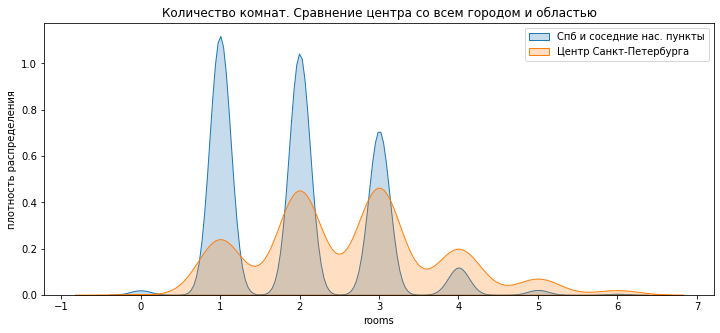

In [88]:
double_plot('rooms', 'Количество комнат')

Основная часть квартир в центре с 2 и 3 комнатами (во всем регионе к ним добавляются и однокомнатные, которых больше всего). 4-комнатных ненамного меньше, чем 1-комнатных. Доля 4-х и 5-ых квартир больше, чем во всех данных. Таким образом, в центре продаются квартиры с большим количеством комнат, чем в целом по Санкт-Петербургу и области. Основная часть значений: 2-3 комнаты (Спб и область - 1-3); медиана: 3 (2)).

#### 4.9.5. Высота потолков. 

In [89]:
print('Центр Санкт-Петербурга:\n\n', spb_center['ceiling_height'].describe())
print()
print('Санкт-Петербург и соседние населенные пункты:\n\n', good_data['ceiling_height'].describe())

Центр Санкт-Петербурга:

 count    1221.000000
mean        2.739296
std         0.143659
min         2.400000
25%         2.650000
50%         2.650000
75%         2.820000
max         3.000000
Name: ceiling_height, dtype: float64

Санкт-Петербург и соседние населенные пункты:

 count    18006.000000
mean         2.651485
std          0.112012
min          2.400000
25%          2.600000
50%          2.650000
75%          2.650000
max          3.000000
Name: ceiling_height, dtype: float64


(2.4, 3.1)

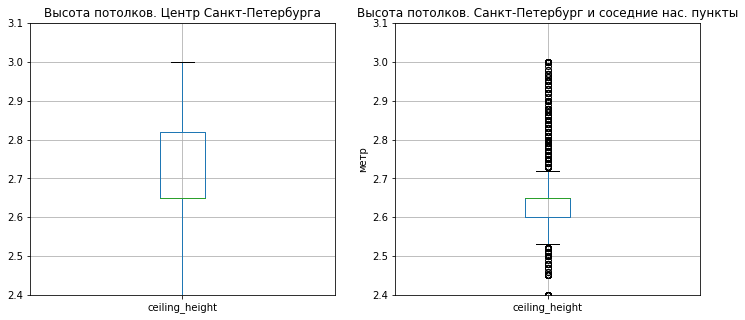

In [90]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
plt.ylabel('метр')

spb_center.boxplot('ceiling_height', ax=axes[0]) 
axes[0].set_title('Высота потолков. Центр Санкт-Петербурга')
axes[0].set_ylim([2.4, 3.1])

good_data.boxplot('ceiling_height', ax=axes[1]) 
axes[1].set_title('Высота потолков. Санкт-Петербург и соседние нас. пункты')
axes[1].set_ylim(2.4, 3.1)


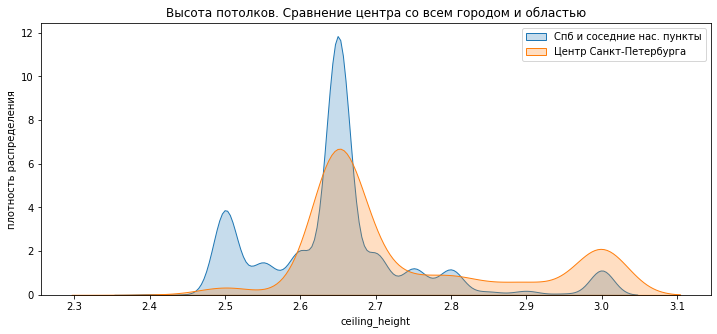

In [91]:
double_plot('ceiling_height', 'Высота потолков')

В центре продаются квартиры с более высокими потолками, чем в целом по городу и области. Мала доля квартир с высотой потолков ниже 2,6 метра и существенно более высок процент квартир с высотой потолков в районе 3 метров, чем в целом по городу и области. Основная часть значений: от 2,65 до 2,87 метра (Спб и область - 2,6-2,65); медиана: 2,65 (2,6)).

#### 4.9.6. Связь цены c общей площадью, количеством комнат и удаленностью от центра

Чтобы оценить степени корреляции между этими параметрами построим диаграммы рассеяния и рассчитаем коэффициент корреляции Пирсона.

In [92]:
# для автоматизации и повышения удобства восприятия информации определим функцию scatter_corr_duble()

'''
Функция scatter_corr_duble(dataframe_1, dataframe_1, variable_1, variable_2, text) строит диаграмму рассеяния 
и выводит сообщение с коэффициентом корреляции Пирсона между двумя переменными. 
Принимает пять аргументов:
 - dataframe_1 - первый датафрейм, к которому применяются функции;
 - dataframe_2 - второй датафрейм, к которому применяются функции;
 - variable_1 - первая переменная (на оси X);
 - variable_2 - вторая переменная (на оси Y);
 - text - текст в названиях графика и в сообщении.
'''

def scatter_corr_duble(dataframe_1, dataframe_2, variable_1, variable_2, text):
    fig, axes = plt.subplots(1,2, figsize = (12,5))
    dataframe_1.plot(x=variable_1, y=variable_2, kind='scatter', alpha=0.7, ax=axes[0])
    axes[0].set_title(f'Корреляция {text}. Центр')
    
    dataframe_2.plot(x=variable_1, y=variable_2, kind='scatter', alpha=0.7, ax=axes[1])
    axes[1].set_title(f'Корреляция {text}. Спб и область')
    print(f'Коэффициент корреляции Пирсона {text} для центра Санкт-Петербурга равен:', 
          dataframe_1[variable_1].corr(dataframe_1[variable_2]))
    print(f'Коэффициент корреляции Пирсона {text} для всего Санкт-Петербурга и области равен:', 
          dataframe_2[variable_1].corr(dataframe_2[variable_2]))

Коэффициент корреляции Пирсона цены и общей площади для центра Санкт-Петербурга равен: 0.7078009050420895
Коэффициент корреляции Пирсона цены и общей площади для всего Санкт-Петербурга и области равен: 0.7516540196254524
Коэффициент корреляции Пирсона цены и количества комнат для центра Санкт-Петербурга равен: 0.4183377020838682
Коэффициент корреляции Пирсона цены и количества комнат для всего Санкт-Петербурга и области равен: 0.44919053924934704
Коэффициент корреляции Пирсона цены и удалённости от центра для центра Санкт-Петербурга равен: -0.0012932515492313057
Коэффициент корреляции Пирсона цены и удалённости от центра для всего Санкт-Петербурга и области равен: -0.2508937401005332


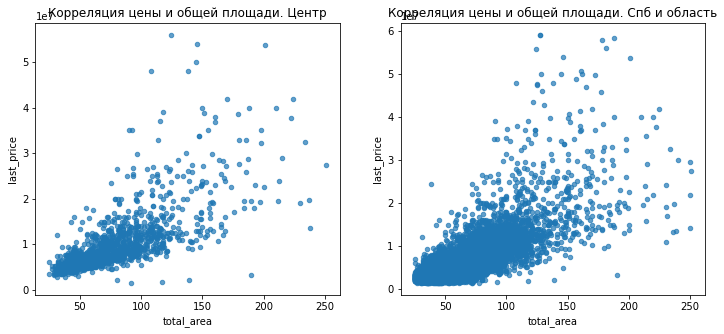

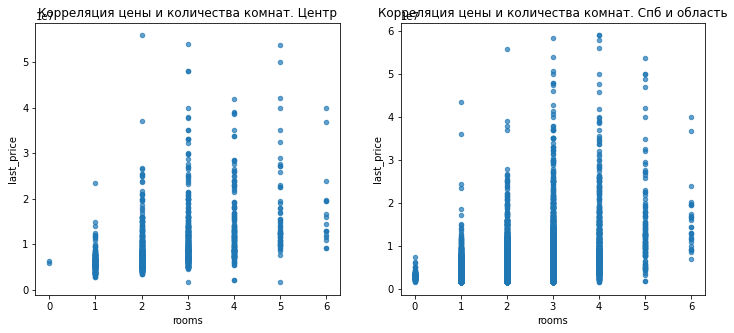

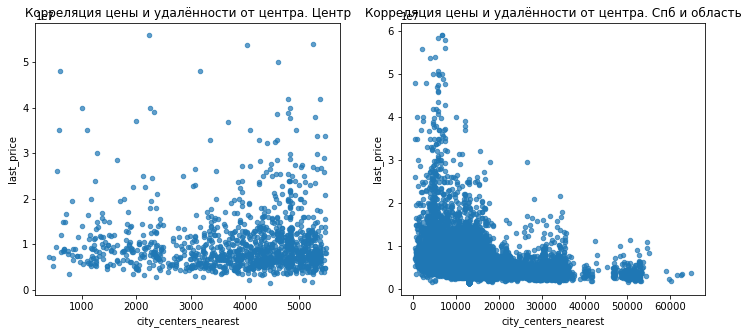

In [93]:
# построим диаграммы рассеяния для цены и трех параметров: общей площади, количеством комнат и удалённостью от центра 
scatter_corr_duble(spb_center, good_data, 'total_area', 'last_price', 'цены и общей площади')
scatter_corr_duble(spb_center, good_data, 'rooms', 'last_price', 'цены и количества комнат')
scatter_corr_duble(spb_center, good_data, 'city_centers_nearest', 'last_price', 'цены и удалённости от центра')

#### 4.9.7. Связь цены c этажом, на котором расположена квартира.

<function matplotlib.pyplot.legend(*args, **kwargs)>

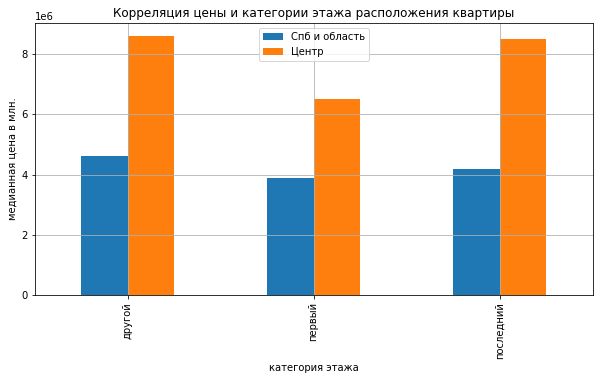

In [94]:
# сводная таблица категорий этажа и медианной цены квартиры по всему городу и области
good_data_floor = good_data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
# сводная таблица категорий этажа и медианной цены квартиры по центру Санкт-Петербурга
spb_center_floor = spb_center.pivot_table(index='floor_category', values='last_price', aggfunc='median')

# объединенная таблица двух сводных таблиц
final_price_floor = good_data_floor.merge(spb_center_floor, on='floor_category', how='left')

# переименование столбцов для удобства восприятия на графике
final_price_floor.columns = ['Спб и область', 'Центр']

# сводная столбчатая диагарамма цены и категории этажа по центру Спб и всему Спб и области
final_price_floor.plot(kind='bar', grid=True, figsize=(10, 5))
plt.xlabel('категория этажа')
plt.ylabel('медианная цена в млн.')
plt.title('Корреляция цены и категории этажа расположения квартиры')
plt.legend

#### 4.9.8. Связь цены и даты размещения объявления

<function matplotlib.pyplot.legend(*args, **kwargs)>

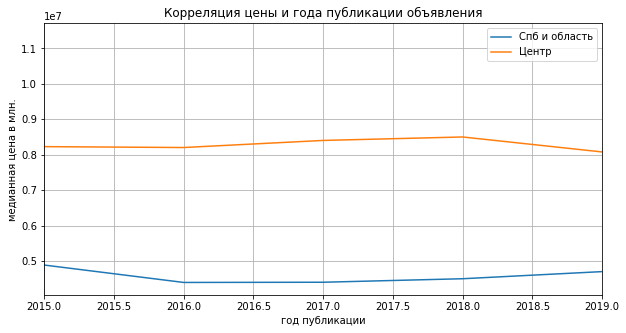

In [95]:
# сводная таблица даты публикации объявления и медианной цены квартиры по всему городу и области
good_data_year = good_data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
# сводная таблица даты публикации и медианной цены квартиры по центру Санкт-Петербурга
spb_center_year = spb_center.pivot_table(index='year_exposition', values='last_price', aggfunc='median')

# объединенная таблица двух сводных таблиц
final_price_year = good_data_year.merge(spb_center_year, on='year_exposition', how='left')

# переименование столбцов для удобства восприятия на графике
final_price_year.columns = ['Спб и область', 'Центр']

# сводная столбчатая диагарамма цены и даты публикации по центру Спб и всему Спб и области
final_price_year.plot(grid=True, figsize=(10, 5), xlim=(2015,2019))
plt.xlabel('год публикации')
plt.ylabel('медианная цена в млн.')
plt.title('Корреляция цены и года публикации объявления')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

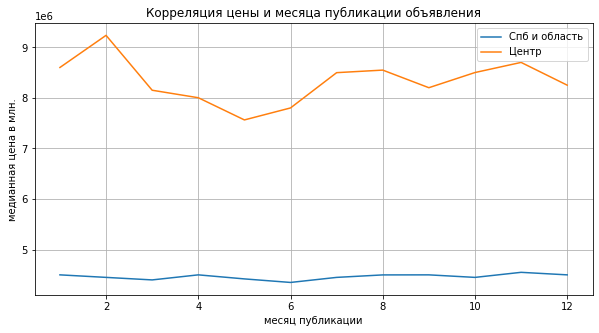

In [96]:
# сводная таблица даты публикации объявления и медианной цены квартиры по всему городу и области
good_data_month = good_data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
# сводная таблица даты публикации и медианной цены квартиры по центру Санкт-Петербурга
spb_center_month = spb_center.pivot_table(index='month_exposition', values='last_price', aggfunc='median')

# объединенная таблица двух сводных таблиц
final_price_month = good_data_month.merge(spb_center_month, on='month_exposition', how='left')

# переименование столбцов для удобства восприятия на графике
final_price_month.columns = ['Спб и область', 'Центр']

# сводная столбчатая диагарамма цены и даты публикации по центру Спб и всему Спб и области
final_price_month.plot(grid=True, figsize=(10, 5))
plt.xlabel('месяц публикации')
plt.ylabel('медианная цена в млн.')
plt.title('Корреляция цены и месяца публикации объявления')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

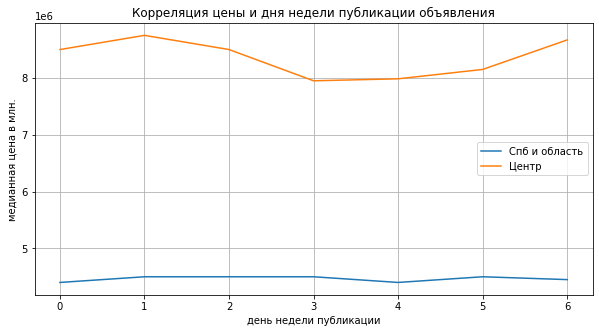

In [97]:
# сводная таблица даты публикации объявления и медианной цены квартиры по всему городу и области
good_data_weekday = good_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
# сводная таблица даты публикации и медианной цены квартиры по центру Санкт-Петербурга
spb_center_weekday = spb_center.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')

# объединенная таблица двух сводных таблиц
final_price_weekday = good_data_weekday.merge(spb_center_weekday, on='weekday_exposition', how='left')

# переименование столбцов для удобства восприятия на графике
final_price_weekday.columns = ['Спб и область', 'Центр']

# сводная столбчатая диагарамма цены и даты публикации по центру Спб и всему Спб и области
final_price_weekday.plot(grid=True, figsize=(10, 5))
plt.xlabel('день недели публикации')
plt.ylabel('медианная цена в млн.')
plt.title('Корреляция цены и дня недели публикации объявления')
plt.legend

### 4.10. Выводы  
  
1. В резульате анализа связи иземения медианной стоимости квартир с их удаленностью от центра была определена область центра Санкт-Петербурга в радиусе 5 километров.  
2. Квартиры в центре Санкт-Петербурга по сравнению с квартирами в целом по Санкт-Петербургу и области в среднем:  
  - в 1,5 раза больше и разнообразнее по размерам (основная часть значений от 54 до 97 м2 (Спб и область - 39-65); медиана: 73 (50));  
 - почти в 2 раза дороже и разнообразнее по ценам (основная часть значений от 6,4 до 12 млн. (Спб и область - 3,4-6,2); медиана: 8,4 (4,5));   
 - с большим количеством комнат (основная часть значений: 2-3 комнаты (Спб и область - 1-3); медиана: 3 (2));  
 - с более высокими потолками (основная часть значений: от 2,65 до 2,87 метра (Спб и область - 2,6-2,65); медиана: 2,65 (2,6)).   

 3. Стоимость квартиры в центре Санкт-Петербурга по сравнению с квартирами в целом по Санкт-Петербургу и области имеет:

 - менее выраженную положительную взаимосвязь с общей площадью (коэффициент корреляции Пирсона 0,70 против 0,75);  
 - схожую выраженную связь с количеством комнат: цена квартиры растет с увеличением количества комнат до 3х и падает, начиная с 4-х комнатных квартир;  
 - отличную от выраженной положительной по городу и области низкую отрицательную взаимосвязь с удаленностью от центра: стоимость квартир с приближением к границе области центра показывает небольшой рост. Но с приближением к границе области центра значительно увеличивается количество продаваемых квартир, что может искажать обнаруженную закономерность взаимосвязи цены и удаленности от центра;   
 - схожую, но значительно более выраженную взаимосвязь с этажом квартиры: цена существенно ниже для квартир на первом этаже, чем для квартир на последнем и между первым и последним этажами, которые имеют близкие значения;  
 - также незначительную взаимосвязь с годом публикации. Но в отличие от взаимосвязи по Спб и области, характеризующуюся отсутствием колебания медианной цены до 2016. И, напротив, не ростом, а небольшим падением цены после 2018;   
 - существенно более выраженную взаимосвязь с месяцем публикации. Рельеф кривой повторяет таковую у распределения по всему городу и области, но с существенно большими перепадами. Уменьшение среднегодовой медианной стоимости начинается раньше на месяц в феврале, и к маю цена снижается с 9,2 млн. до 7,6 млн. После чего начинает расти, с небольшим спадом в сентябре, до 8,7 в ноябре, после чего вновь показывает падение до 8,1 в декабре;  
 - выраженную взаимосвязь с днем недели публикации, в отличии от корреляции по Спб и области, характеризующуюся сильными колебаниями медианной цены, которая снижается с 8,8 во вторник до 7,9 млн. к среде, после чего начинает расти до 8,7 в воскресенье, к понедельнику снижаясь до 8,6 и вырастая во вторник.

## 5. Общий вывод

1. В результате анализа архива объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах  с 2014 по первую половину 2019 года удалось обнаружить ряд закономерностей, которые могут быть использованы в разработке автоматизированной системы отслеживания аномалий и мошеннической деятельности.  
2. К аномальным отнесены значения параметров квартиры, которые не входят в следующие диапазоны:  
- общая площадь: от 25 и до 250 квадратных метров;  
- цена: 1,5 до 60 миллионов рублей;  
- количество комнат: от 1 до 6;  
- высота потолков: от 2,4 до 3 метров;  
- время продажи: от 3 до 800 дней.  

Дальнейшие закономерности были найдены на основании анализа данных в этих диапазонах.  

3. Быстрой продажей можно считать квартиру, проданную в пределах 45 дней, а долгой - с 230 дня размещения объявления.  
4. Стоимость квартиры по всему Санкт-Петербургу и соседним населенным пунктам имеет: 
- выраженную прямую взаимосвязь с общей площадью, удаленностью от центра, с количеством комнат, с месяцем публикации объявления;  
- среднюю взаимосвязь с этажом квартиры;  
- незначительную взаимосвязь с годом и днем публикации объявления;     
5. Стоимость квартиры в центре Санкт-Петербурга (радиус до 5 км) по сравнению с квартирами в целом по Санкт-Петербургу и области имеет:  
 - менее выраженную прямую взаимосвязь с общей площадью;  
 - схожую выраженную прямую взаимосвязь с количеством комнат;  
 - отличающуюся низкую обратную взаимосвязь с удаленностью от центра;   
 - схожую, но значительно более выраженную взаимосвязь с этажом квартиры (цена зависит от категории этажа);  
 - также незначительную взаимосвязь с годом публикации. Заметна тенденция роста цен на жилье эконом-класса и падение стоимости жилья бизнес-класса с 2018 года;   
 - существенно более выраженную взаимосвязь с месяцем публикации;  
 - выраженную взаимосвязь с днем недели публикации, в отличии от корреляции по Спб и области, характеризующуюся сильными колебаниями медианной цены.
6. Квартиры в центре Санкт-Петербурга по сравнению с квартирами в целом по Санкт-Петербургу и области в среднем:  
 - в 1,5 раза больше и разнообразнее по размерам;  
 - почти в 2 раза дороже и разнообразнее по стоимости. При этом надо учитывать, что есть отдельное элитное жилье в пригородах. Так, самая высокая цена квадратного метра не в Санкт-Петербурге, а во Всеволжске;   
 - с более высоким количеством комнат;  
 - с более высокими потолками. 







## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  найдены и обрабтаны дубликаты
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- [x] "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод